In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn import linear_model

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

In [4]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [5]:
from nsepy import get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
start_date = date(2015,1,1)
end_date = date(2023,2,15)

#Symbol is visible in NSE website. It's like a short name given to every company
reliance = get_history(symbol ='RELIANCE',start = start_date, end = end_date)
print(reliance)

              Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2015-01-01  RELIANCE     EQ      891.15   886.30   892.00   883.65   888.00   
2015-01-02  RELIANCE     EQ      887.90   888.10   896.05   884.30   884.95   
2015-01-05  RELIANCE     EQ      885.55   885.00   890.90   874.10   875.55   
2015-01-06  RELIANCE     EQ      875.85   870.00   873.00   832.00   832.50   
2015-01-07  RELIANCE     EQ      836.10   837.10   858.80   837.00   858.00   
...              ...    ...         ...      ...      ...      ...      ...   
2023-02-09  RELIANCE     EQ     2351.95  2353.45  2370.85  2334.00  2353.60   
2023-02-10  RELIANCE     EQ     2356.05  2354.90  2354.90  2321.30  2336.50   
2023-02-13  RELIANCE     EQ     2336.65  2340.20  2350.00  2313.55  2324.60   
2023-02-14  RELIANCE     EQ     2323.35  2329.95  2381.90  2323.65  2380.00   
2023-02-15  RELIANCE     EQ     2378.10  2376.00  24

In [7]:
# Converting the data to dataframe
reliance_data = pd.DataFrame(reliance)
reliance_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,RELIANCE,EQ,891.15,886.30,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227
2015-01-02,RELIANCE,EQ,887.90,888.10,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2015-01-05,RELIANCE,EQ,885.55,885.00,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032
2015-01-06,RELIANCE,EQ,875.85,870.00,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527
2015-01-07,RELIANCE,EQ,836.10,837.10,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09,RELIANCE,EQ,2351.95,2353.45,2370.85,2334.00,2353.60,2356.05,2354.91,6079228,1.431601e+15,264097,3862283,0.6353
2023-02-10,RELIANCE,EQ,2356.05,2354.90,2354.90,2321.30,2336.50,2336.65,2331.77,4979789,1.161172e+15,188258,2634108,0.5290
2023-02-13,RELIANCE,EQ,2336.65,2340.20,2350.00,2313.55,2324.60,2323.35,2323.49,4777674,1.110088e+15,151763,2780205,0.5819


In [8]:
data = reliance_data.reset_index()

In [9]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,RELIANCE,EQ,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227
1,2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2,2015-01-05,RELIANCE,EQ,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032
3,2015-01-06,RELIANCE,EQ,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527
4,2015-01-07,RELIANCE,EQ,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092


In [10]:
# convert date field from string to Date format and make it index
data['Date'] = pd.to_datetime(data.Date)
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,RELIANCE,EQ,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227
1,2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2,2015-01-05,RELIANCE,EQ,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032
3,2015-01-06,RELIANCE,EQ,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527
4,2015-01-07,RELIANCE,EQ,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092


In [11]:
df = data.loc[:, ["Date","Open","High","Low","Close","Volume"]]

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-01,886.3,892.00,883.65,887.90,677439
1,2015-01-02,888.1,896.05,884.30,885.55,1675827
2,2015-01-05,885.0,890.90,874.10,875.85,2309591
3,2015-01-06,870.0,873.00,832.00,836.10,4258043
4,2015-01-07,837.1,858.80,837.00,854.30,4736315


In [13]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [15]:
df1=df.reset_index()['Close']

In [16]:
df1

0        887.90
1        885.55
2        875.85
3        836.10
4        854.30
         ...   
2009    2356.05
2010    2336.65
2011    2323.35
2012    2378.10
2013    2431.95
Name: Close, Length: 2014, dtype: float64

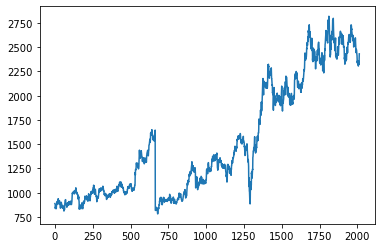

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
print(df1)

[[0.05247799]
 [0.05132544]
 [0.04656809]
 ...
 [0.75649231]
 [0.78334437]
 [0.80975502]]


In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(1611, 403)

In [22]:
train_data

array([[0.05247799],
       [0.05132544],
       [0.04656809],
       ...,
       [0.64594522],
       [0.66119817],
       [0.67157115]])

In [23]:
test_data

array([[0.65911376],
       [0.65187964],
       [0.64332132],
       [0.63282572],
       [0.6391525 ],
       [0.6468035 ],
       [0.64008436],
       [0.63829422],
       [0.6530322 ],
       [0.64643567],
       [0.64390986],
       [0.65710292],
       [0.64974619],
       [0.63559675],
       [0.62488045],
       [0.61622404],
       [0.62402217],
       [0.61521862],
       [0.6334633 ],
       [0.64094264],
       [0.64878982],
       [0.6637485 ],
       [0.64158023],
       [0.63574389],
       [0.64108978],
       [0.6554354 ],
       [0.65210035],
       [0.66933961],
       [0.6829986 ],
       [0.67846195],
       [0.68258172],
       [0.67061478],
       [0.6775301 ],
       [0.68800118],
       [0.69727065],
       [0.71092965],
       [0.70943378],
       [0.7304495 ],
       [0.72451507],
       [0.72890458],
       [0.74229383],
       [0.78844503],
       [0.80664067],
       [0.81414454],
       [0.80946075],
       [0.80664067],
       [0.78013193],
       [0.778

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy 
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(1510, 100)
(1510,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(302, 100)
(302,)


(None, None)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 32s 489ms/step - loss: 0.0146 - val_loss: 0.0029
Epoch 2/100
24/24 [==============================] - 8s 326ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 3/100
24/24 [==============================] - 10s 403ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 4/100
24/24 [==============================] - 10s 432ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 5/100
24/24 [==============================] - 9s 392ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 6/100
24/24 [==============================] - 8s 319ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 7/100
24/24 [==============================] - 8s 333ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 8/100
24/24 [==============================] - 8s 348ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 9/100
24/24 [==============================] - 9s 369ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 10/100
24/24 [==============================] - 11s 461ms/step - loss: 0.0013 - va

Epoch 78/100
24/24 [==============================] - 9s 395ms/step - loss: 3.4125e-04 - val_loss: 4.7807e-04
Epoch 79/100
24/24 [==============================] - 12s 492ms/step - loss: 2.8778e-04 - val_loss: 9.3107e-04
Epoch 80/100
24/24 [==============================] - 14s 584ms/step - loss: 3.3565e-04 - val_loss: 0.0020
Epoch 81/100
24/24 [==============================] - 15s 607ms/step - loss: 3.5268e-04 - val_loss: 4.1296e-04
Epoch 82/100
24/24 [==============================] - 14s 601ms/step - loss: 3.1739e-04 - val_loss: 0.0017
Epoch 83/100
24/24 [==============================] - 18s 758ms/step - loss: 3.3026e-04 - val_loss: 5.3483e-04
Epoch 84/100
24/24 [==============================] - 14s 586ms/step - loss: 3.4183e-04 - val_loss: 9.7857e-04
Epoch 85/100
24/24 [==============================] - 13s 539ms/step - loss: 2.9533e-04 - val_loss: 0.0018
Epoch 86/100
24/24 [==============================] - 10s 414ms/step - loss: 3.3399e-04 - val_loss: 0.0013
Epoch 87/100
24/24

In [35]:
import tensorflow as tf


In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

10/10 [==============================] - 1s 72ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1366.5739301348603

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


2498.039868524899

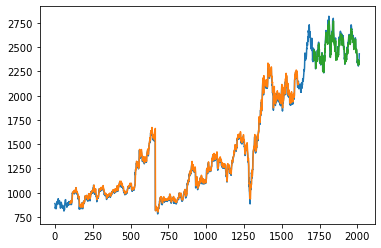

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)

403

In [49]:
x_input=test_data[303:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
temp_input

[0.8134579072561856,
 0.7829765320385491,
 0.7922460089752077,
 0.7609553937075455,
 0.7574486868241006,
 0.7831727114446161,
 0.7791265111944874,
 0.8005591113072903,
 0.8049241030922778,
 0.8099512003727407,
 0.7969297922950538,
 0.7734373084185489,
 0.7819465901566982,
 0.7856494764462101,
 0.7797150494126877,
 0.7983766154147969,
 0.8192206773093993,
 0.8401383064812771,
 0.8434243115328968,
 0.8292013045930502,
 0.8332475048431789,
 0.8144633267122785,
 0.8191716324578826,
 0.8559552710954168,
 0.8674562887760857,
 0.857769930601535,
 0.8655190171411755,
 0.8701782780352632,
 0.8886191422055469,
 0.8954118541406115,
 0.894136688001177,
 0.8786875597734127,
 0.907771156722823,
 0.9015179381544423,
 0.8957551681012286,
 0.88842296279948,
 0.8917089678510999,
 0.8910223399298658,
 0.8680938718458029,
 0.8750337183354178,
 0.8711101302140809,
 0.8819245199735157,
 0.9008067878074497,
 0.9449226317467323,
 0.9472032173422593,
 0.9565953064077097,
 0.9526471958606146,
 0.952083180068172

In [52]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8104888]
101
1 day input [0.78297653 0.79224601 0.76095539 0.75744869 0.78317271 0.77912651
 0.80055911 0.8049241  0.8099512  0.79692979 0.77343731 0.78194659
 0.78564948 0.77971505 0.79837662 0.81922068 0.84013831 0.84342431
 0.8292013  0.8332475  0.81446333 0.81917163 0.85595527 0.86745629
 0.85776993 0.86551902 0.87017828 0.88861914 0.89541185 0.89413669
 0.87868756 0.90777116 0.90151794 0.89575517 0.88842296 0.89170897
 0.89102234 0.86809387 0.87503372 0.87111013 0.88192452 0.90080679
 0.94492263 0.94720322 0.95659531 0.9526472  0.95208318 0.93261237
 0.93641335 0.91694254 0.91632948 0.89663798 0.89859977 0.90443611
 0.89977685 0.88155668 0.87530347 0.89183158 0.90286667 0.88457294
 0.88128694 0.84420903 0.85492533 0.86505309 0.86493048 0.86436646
 0.86627921 0.88035508 0.87111013 0.85222786 0.85002084 0.86122759
 0.89060546 0.87177224 0.85595527 0.8292013  0.82723951 0.81571397
 0.83273253 0.83072169 0.82942201 0.81500282 0.80894578 0.80190784
 0.78552686 0.76335859 0.77434464 

8 day output [[0.8038199]]
9 day input [0.8099512  0.79692979 0.77343731 0.78194659 0.78564948 0.77971505
 0.79837662 0.81922068 0.84013831 0.84342431 0.8292013  0.8332475
 0.81446333 0.81917163 0.85595527 0.86745629 0.85776993 0.86551902
 0.87017828 0.88861914 0.89541185 0.89413669 0.87868756 0.90777116
 0.90151794 0.89575517 0.88842296 0.89170897 0.89102234 0.86809387
 0.87503372 0.87111013 0.88192452 0.90080679 0.94492263 0.94720322
 0.95659531 0.9526472  0.95208318 0.93261237 0.93641335 0.91694254
 0.91632948 0.89663798 0.89859977 0.90443611 0.89977685 0.88155668
 0.87530347 0.89183158 0.90286667 0.88457294 0.88128694 0.84420903
 0.85492533 0.86505309 0.86493048 0.86436646 0.86627921 0.88035508
 0.87111013 0.85222786 0.85002084 0.86122759 0.89060546 0.87177224
 0.85595527 0.8292013  0.82723951 0.81571397 0.83273253 0.83072169
 0.82942201 0.81500282 0.80894578 0.80190784 0.78552686 0.76335859
 0.77434464 0.77145099 0.76460924 0.75825793 0.75926335 0.75065597
 0.74793399 0.77051914 0

16 day output [[0.80626285]]
17 day input [0.84013831 0.84342431 0.8292013  0.8332475  0.81446333 0.81917163
 0.85595527 0.86745629 0.85776993 0.86551902 0.87017828 0.88861914
 0.89541185 0.89413669 0.87868756 0.90777116 0.90151794 0.89575517
 0.88842296 0.89170897 0.89102234 0.86809387 0.87503372 0.87111013
 0.88192452 0.90080679 0.94492263 0.94720322 0.95659531 0.9526472
 0.95208318 0.93261237 0.93641335 0.91694254 0.91632948 0.89663798
 0.89859977 0.90443611 0.89977685 0.88155668 0.87530347 0.89183158
 0.90286667 0.88457294 0.88128694 0.84420903 0.85492533 0.86505309
 0.86493048 0.86436646 0.86627921 0.88035508 0.87111013 0.85222786
 0.85002084 0.86122759 0.89060546 0.87177224 0.85595527 0.8292013
 0.82723951 0.81571397 0.83273253 0.83072169 0.82942201 0.81500282
 0.80894578 0.80190784 0.78552686 0.76335859 0.77434464 0.77145099
 0.76460924 0.75825793 0.75926335 0.75065597 0.74793399 0.77051914
 0.77252998 0.76301528 0.75649231 0.78334437 0.80975502 0.81048882
 0.80533671 0.80192071

24 day output [[0.8035924]]
25 day input [0.85776993 0.86551902 0.87017828 0.88861914 0.89541185 0.89413669
 0.87868756 0.90777116 0.90151794 0.89575517 0.88842296 0.89170897
 0.89102234 0.86809387 0.87503372 0.87111013 0.88192452 0.90080679
 0.94492263 0.94720322 0.95659531 0.9526472  0.95208318 0.93261237
 0.93641335 0.91694254 0.91632948 0.89663798 0.89859977 0.90443611
 0.89977685 0.88155668 0.87530347 0.89183158 0.90286667 0.88457294
 0.88128694 0.84420903 0.85492533 0.86505309 0.86493048 0.86436646
 0.86627921 0.88035508 0.87111013 0.85222786 0.85002084 0.86122759
 0.89060546 0.87177224 0.85595527 0.8292013  0.82723951 0.81571397
 0.83273253 0.83072169 0.82942201 0.81500282 0.80894578 0.80190784
 0.78552686 0.76335859 0.77434464 0.77145099 0.76460924 0.75825793
 0.75926335 0.75065597 0.74793399 0.77051914 0.77252998 0.76301528
 0.75649231 0.78334437 0.80975502 0.81048882 0.80533671 0.80192071
 0.80085206 0.80081564 0.80126041 0.80200702 0.80290711 0.80381989
 0.80464387 0.8053237

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [54]:
import matplotlib.pyplot as plt

In [55]:
len(df1)

2014

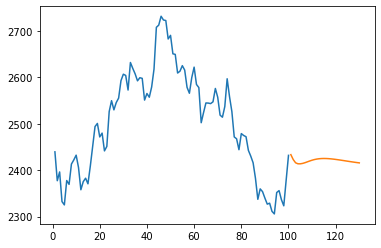

In [56]:
# 30 days prediction
plt.plot(day_new,scaler.inverse_transform(df1[1914:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))